<a href="https://colab.research.google.com/github/triasisghosh/Sentiment-Analysis/blob/main/sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting the developer credentials.

In [ ]:
api_key=''
api_key_secret=''
access_token=''
access_token_secret=''


Installing the requirements

In [ ]:
!pip install textblob

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.7 MB/s 
     |████████████████████████████████| 6.6 MB 42.1 MB/s 
     |████████████████████████████████| 120 kB 72.7 MB/s 


In [ ]:
!pip install pandas

In [ ]:
!pip install IPython

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install matplotlib

Importing libraries

In [ ]:
import tweepy
from textblob import TextBlob
import pandas
from IPython.display import display
import numpy
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import matplotlib.pyplot as plt

Training the analyser with Roberta model

In [ ]:
roberta='cardiffnlp/twitter-roberta-base-sentiment'
model=AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer=AutoTokenizer.from_pretrained(roberta)

Set the keyword for which, media sentiment analysis is required. startDate variable stores the date from when data to be analyzed. n is the number of posts to be checked.

In [ ]:
companyName='Amazon'
startDate='2015-01-01'
n=365

Function for cleaning the tweets using Regular Expression (Basically a part of preparing the dataset)

In [ ]:
def cleanText(txt):
  txt=re.sub('#'+companyName,companyName,txt)
  txt=re.sub("#+",'',txt)
  txt=re.sub('https?:\/\/S+','',txt)
  txt=re.sub('\n','',txt)
  txt=re.sub('RT[\s]+','',txt)
  txt=re.sub('@+','@user ',txt)
  return txt

In [ ]:
auth=tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
query=companyName
tweets=tweepy.Cursor(api.search, q=query, language='en', since=startDate, tweet_mode='extended').items(n)
all_tweets=[tweet.full_text for tweet in tweets]
print(len(all_tweets))

365


Collecting and cleaning data.

In [ ]:
responseTable=pandas.DataFrame(all_tweets,columns=['Tweets'])
responseTable['Tweets']=responseTable['Tweets'].apply(cleanText)
display(responseTable)

,Tweets
0,@user gyu__tann: 重岡くんのスペシャルインタビュー！？日経エンタテインメント...
1,@user daidroid: 【ＮＥＸＣＬ 再世女神の超神譚 第２章 北欧大戦イマジンゴッ...
2,@user GMikezuri: ／『ドラゴンクエストX 目覚めし五つの種族 オフライン』ま...
3,@user Do2Pop: 📕雑誌掲載情報haru*hana2022秋 絶対ハマる！韓国エン...
4,Amazonオーディブルで城谷 歩の作品探してたら実説 城谷怪談「もうして 其の一」があるら...
...,...
360,@user ikkyu_tw: ／鶏と蕎麦・大衆鉄板一休池袋店 ✨抽選で100名様に当たる！...
361,@user kazeno_fantasia: 【事前登録開始記念RTキャンペーン第1弾！】「...
362,@user NIKKE_japan: 【グローバル事前登録開始記念キャンペーン📢5日目】総額...
363,Motion Pro 08-0092 Anodized Blue Degree Wheel ...


Sentiment analysis using Roberta model

In [ ]:
result={}
for i in range(len(all_tweets)):
  try:
    encoded_tweet=tokenizer(responseTable['Tweets'][i],return_tensors='pt')

    decoded_data=model(**encoded_tweet)

    scores=decoded_data[0][0].detach().numpy()
    scores=softmax(scores)
    pol=scores[2]-scores[0]
    op=''
    if scores[0]>scores[1] and scores[0]>scores[2]:
      op='Negative'
    elif scores[1]>scores[0] and scores[1]>scores[2]:
      op='Neutral'
    elif scores[2]>scores[0] and scores[2]>scores[1]:
      op='Positive'
    scores_dict={
        'Tweet':all_tweets[i],
        'Neg':scores[0],
        'Neu':scores[1],
        'Pos':scores[2],
        'Polarity':pol,
        'Opinion':op
      }
    result[i]=scores_dict
  except RuntimeError:
    print(f"\nSize exceed for {i}th data.")

In [ ]:
df=pandas.DataFrame(result).T
display(df)

,Tweet,Neg,Neu,Pos,Polarity,Opinion
0,RT @gyu__tann: 重岡くんのスペシャルインタビュー！？\n\n日経エンタテインメ...,0.219717,0.735197,0.045086,-0.174631,Neutral
1,RT @daidroid: 【ＮＥＸＣＬ 再世女神の超神譚 第２章 北欧大戦イマジンゴッドウ...,0.209507,0.749692,0.040801,-0.168707,Neutral
2,RT @GMikezuri: ／\n『ドラゴンクエストX 目覚めし五つの種族 オフライン』\...,0.239229,0.722344,0.038427,-0.200803,Neutral
3,RT @Do2Pop: 📕雑誌掲載情報\nharu*hana2022秋 絶対ハマる！韓国エン...,0.133955,0.827245,0.0388,-0.095155,Neutral
4,Amazonオーディブルで城谷 歩の作品探してたら実説 城谷怪談「もうして 其の一」があるら...,0.296412,0.669952,0.033636,-0.262776,Neutral
...,...,...,...,...,...,...
360,RT @ikkyu_tw: ／\n#鶏と蕎麦・大衆鉄板一休池袋店 ✨\n抽選で100名様に当...,0.213854,0.745005,0.041141,-0.172713,Neutral
361,RT @kazeno_fantasia: 【事前登録開始記念RTキャンペーン第1弾！】\n「...,0.224147,0.740332,0.035521,-0.188626,Neutral
362,RT @NIKKE_japan: 【グローバル事前登録開始記念キャンペーン📢5日目】\n総額...,0.207316,0.756466,0.036219,-0.171097,Neutral
363,Motion Pro 08-0092 Anodized Blue Degree Wheel ...,0.051349,0.89624,0.052411,0.001062,Neutral


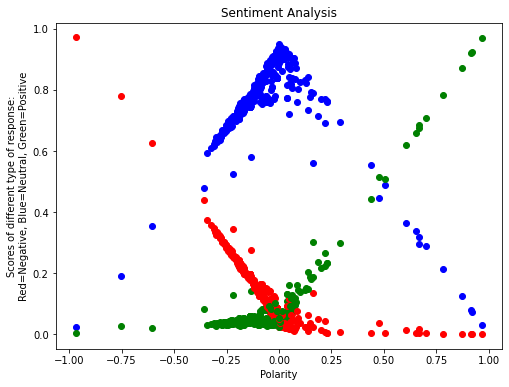

In [ ]:
plt.figure(figsize=(8,6))
for i in range(df.shape[0]):
  try:
    plt.scatter(df['Polarity'][i],df['Neg'][i],color='Red')
    plt.scatter(df['Polarity'][i],df['Neu'][i],color='Blue')
    plt.scatter(df['Polarity'][i],df['Pos'][i],color='Green')
  except KeyError:
    continue

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Scores of different type of response:\nRed=Negative, Blue=Neutral, Green=Positive')
plt.show()

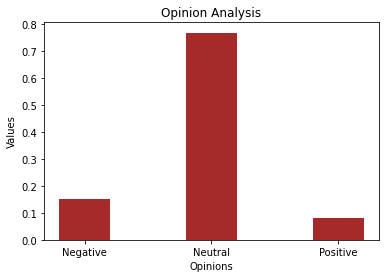

In [ ]:
avg_neg=df['Neg'].mean()
avg_neu=df['Neu'].mean()
avg_pos=df['Pos'].mean()
opinions=['Negative','Neutral','Positive']
values=[avg_neg,avg_neu,avg_pos]
plt.bar(opinions, values, color ='brown',width = 0.4)
 
plt.xlabel("Opinions")
plt.ylabel("Values")
plt.title("Opinion Analysis")
plt.show()

Sentiment analysis using classic TextBlob module

In [ ]:
def sub(txt):
  return TextBlob(txt).sentiment.subjectivity
def pol(txt):
  return TextBlob(txt).sentiment.polarity

responseTable['Subjectivity']=responseTable['Tweets'].apply(sub)
responseTable['Polarity']=responseTable['Tweets'].apply(pol)

op_list=[]
for i in range(responseTable.shape[0]):
  if responseTable['Polarity'][i]<0:
    op_list.append('Negative')
  elif responseTable['Polarity'][i]==0:
    op_list.append('Neutral')
  elif responseTable['Polarity'][i]>0:
    op_list.append('Positive')

responseTable['Opinion']=op_list
display(responseTable)

,Tweets,Subjectivity,Polarity,Opinion
0,@user gyu__tann: 重岡くんのスペシャルインタビュー！？日経エンタテインメント...,0.0,0.0,Neutral
1,@user daidroid: 【ＮＥＸＣＬ 再世女神の超神譚 第２章 北欧大戦イマジンゴッ...,0.0,0.0,Neutral
2,@user GMikezuri: ／『ドラゴンクエストX 目覚めし五つの種族 オフライン』ま...,0.0,0.0,Neutral
3,@user Do2Pop: 📕雑誌掲載情報haru*hana2022秋 絶対ハマる！韓国エン...,0.0,0.0,Neutral
4,Amazonオーディブルで城谷 歩の作品探してたら実説 城谷怪談「もうして 其の一」があるら...,0.0,0.0,Neutral
...,...,...,...,...
360,@user ikkyu_tw: ／鶏と蕎麦・大衆鉄板一休池袋店 ✨抽選で100名様に当たる！...,0.0,0.0,Neutral
361,@user kazeno_fantasia: 【事前登録開始記念RTキャンペーン第1弾！】「...,0.0,0.0,Neutral
362,@user NIKKE_japan: 【グローバル事前登録開始記念キャンペーン📢5日目】総額...,0.0,0.0,Neutral
363,Motion Pro 08-0092 Anodized Blue Degree Wheel ...,0.1,0.0,Neutral


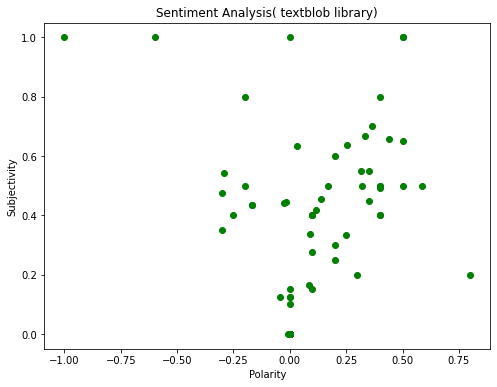

In [ ]:
plt.figure(figsize=(8,6))
for i in range(responseTable.shape[0]):
  plt.scatter(responseTable['Polarity'][i],responseTable['Subjectivity'][i],color='green')

plt.title('Sentiment Analysis( textblob library)')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()